# ***Descripción de la Actividad***

El objeto de esta actividad es participar en la competición de ofrecida de la web de Kaagle denominada: Credit Card Dataset for Clustering:

***https://www.kaggle.com/datasets/arjunbhasin2013/ccdata***


El ejercicio consiste en agrupar a los clientes de tarjetas de crédito en varios grupos de acuerdo con su comportamiento para obtener una serie de cluster que pueden ser utilizados para desarrollar una campaña de Marketing.

Se deberán obtener algunas conclusiones sobre los perfiles de los clientes en cada cluster. 

Ejemplo de referencia a considerar:  Clustering for Effective Marketing Strategy

***https://www.kaggle.com/code/caesarmario/clustering-for-effective-marketing-strategy***


# ***0 - Carga de Datos***

In [93]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Competition_Clustering_Clients_ByBankDetails/CC%20GENERAL.csv'
df = pd.read_csv(url)
df.head().style.background_gradient(cmap='afmhot_r').hide_index()

<ipython-input-93-53ccc99085aa>:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.head().style.background_gradient(cmap='afmhot_r').hide_index()


CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
C10001,40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,nan,0.000000,12
C10005,817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# ***1 - Trasnformaciones de Datos***

## ***¿Hay datos Null, Nan o Infinite en nuestro dataset?***

In [95]:
null_check = df.isnull().values.any()
nan_check = df.isna().values.any()
inf_check = df.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null?:', null_check )
print('¿Hay datos Nan?:', nan_check )
print('¿Hay datos Infinitos?:', inf_check )

¿Hay datos Null?: True
¿Hay datos Nan?: True
¿Hay datos Infinitos?: False


Como la característica CUST_ID tiene una alta cardinalidad (Solo valores únicos de tipo categóricos) vamos a quitarlo, pues tampoco representa un valor muy importante para nuestro dataset.

In [96]:
df['CUST_ID'].unique()

array(['C10001', 'C10002', 'C10003', ..., 'C19188', 'C19189', 'C19190'],
      dtype=object)

In [97]:
df = df.drop(['CUST_ID'], axis = 'columns')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Como aún existen datos Null y Nan en el dataset, vamos a eliminarlos.

In [99]:
nan_columns = df.columns[df.isna().any()].tolist()
null_columns = df.columns[df.isnull().any()].tolist()
print(f'Columnas con datos NAN: {nan_columns}')
print(f'Columnas con datos NAN: {null_columns}')

Columnas con datos NAN: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
Columnas con datos NAN: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


In [100]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

Se han elimnado 314 filas, un 3,5% del dataset. Es un valor asumible de pérdidas.

## ***Como existen varianzas entre los datos muy grandes, vamos a escalarlos.***

In [101]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head().style.background_gradient(cmap='afmhot_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


## ***Matriz de Correlación de datos***

<Axes: >

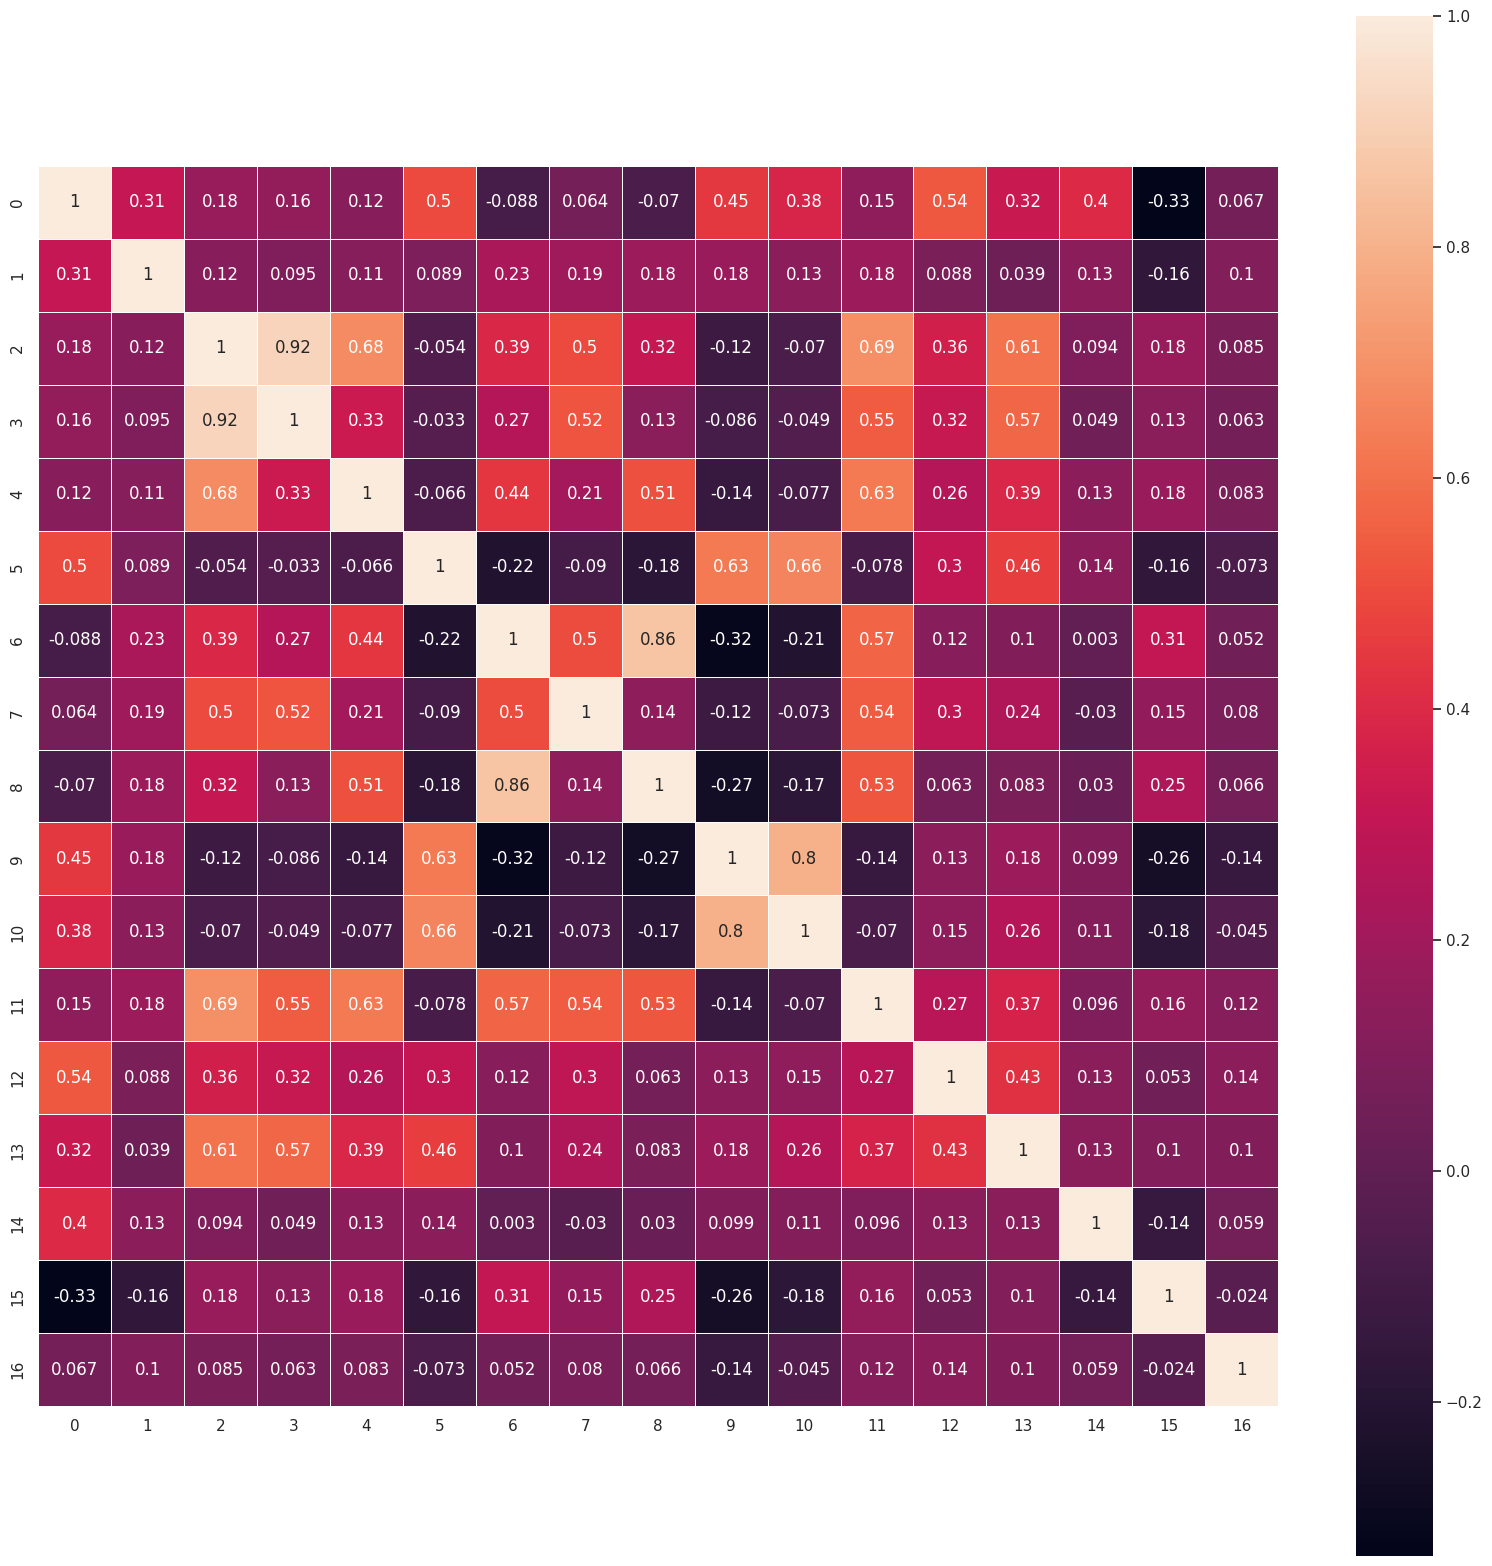

In [102]:
# Se utiliza la librería Seaborn descargada más arriba
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
fig, ax = plt.subplots(figsize=(20,20))  # Manipular el tamaño del Mapa
sns.heatmap(df_scaled.corr(), square=True, annot=True, linewidths=.5, ax=ax)

## ***Estudio de las características con dendogramas.***

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
<ipython-input-103-376dd4faf1a2>:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


Distancia Media	 111.22


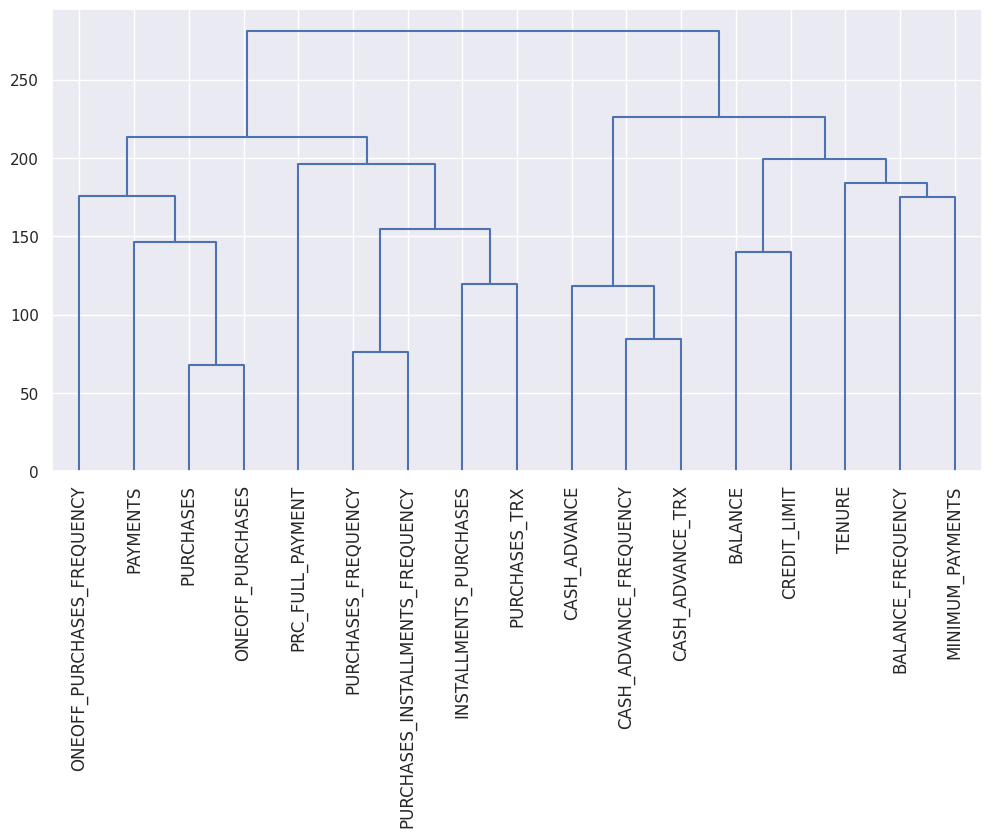

In [103]:
import sklearn.neighbors
# Obtenemos la traspuesta de la matriz de las características
df_T = df_scaled.T

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean') 
D = dist.pairwise(df_T)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Constuimos el dendograma	
from scipy import cluster	
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
threshold_2 = 7

# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=df.columns.to_list(), leaf_rotation=90)
plt.show()

## ***Uso de las PCA para reducir la dimensionalidad de los datos***

In [104]:
from sklearn.decomposition import PCA

# --- Transformamos el dataframe en un array ---
df_scaled = np.asarray(df_scaled)

# --- Aplicamos PCA y reducimos los componentes a 2 ---
pca = PCA(n_components=2, random_state=24)
df_scaled = pca.fit_transform(df_scaled)

# ***2 - Creación de los Clústeres de Clientes***

Se generan los clústeres de clientes.

In [105]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)

# Agregar la columna de cluster al DataFrame original
df['Cluster'] = clusters

# Agrupar el DataFrame por cluster y seleccionar los clientes de cada cluster
for cluster_id, group in df.groupby('Cluster'):
    print(f"Clientes del cluster {cluster_id}:")
    print(group)

Clientes del cluster -1:
          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
71    2990.422186           0.909091    4523.27           1664.09   
109   6644.201651           1.000000    4478.75           2721.59   
120   8504.876253           1.000000    6724.26           4100.08   
125   2392.917738           1.000000   12462.44          12462.44   
133   9354.060450           1.000000     796.33            796.33   
...           ...                ...        ...               ...   
7254  4530.205197           1.000000    1750.66            643.18   
7427  9220.534572           1.000000    1420.31            777.66   
7645  7081.171387           1.000000       0.00              0.00   
7723   427.642111           0.888889       0.00              0.00   
8315  2648.244646           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
71                   2859.18  27296.485760             0.666667   
109         

## ***Evaluación del clústering***

Utilizaremos las siguientes métricas para evaluar el modelo.



*   La métrica de ***Davies-Bouldin*** mide la similitud entre cada clúster y sus clústeres vecinos en función de la distancia entre los centroides y el tamaño del clúster. Cuanto menor sea el valor de la puntuación de Davies-Bouldin, mejor será la separación entre los clústeres.

*   La métrica de ***silueta media*** mide la similitud de cada punto dentro de su clúster en comparación con otros clústeres. Para cada punto, se calcula la distancia promedio a los puntos en su clúster y la distancia promedio a los puntos en el clúster más cercano. La puntuación de silueta media es el promedio de la diferencia entre estas dos distancias para todos los puntos en el conjunto de datos. Un valor más cercano a 1 indica una mejor separación entre los clústeres.

*   La métrica de ***Calinski-Harabasz***, también conocida como el índice de varianza entre grupos, mide la relación entre la varianza dentro de los clústeres y la varianza entre los clústeres. Cuanto mayor sea el valor del índice, mejor será la calidad del clustering.



In [106]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Obtener las etiquetas y los centroides del modelo DBSCAN
labels = dbscan.labels_

# Evaluar el modelo con el índice de Davies-Bouldin
db_score = round(davies_bouldin_score(df, labels), 3)
print("> Índice de Davies-Bouldin: ", db_score)

# Evaluar el modelo con la silueta media
s_score = round(silhouette_score(df, labels), 3)
print("> Silueta media: ", s_score)

# Evaluar el modelo con el índice de Davies-Bouldin
ch_score = round(calinski_harabasz_score(df, labels), 3)
print("> Puntuación de Calinski-Harabasz: ", ch_score)


> Índice de Davies-Bouldin:  2.843
> Silueta media:  0.613
> Puntuación de Calinski-Harabasz:  538.599


Representación gráfica de los resultados

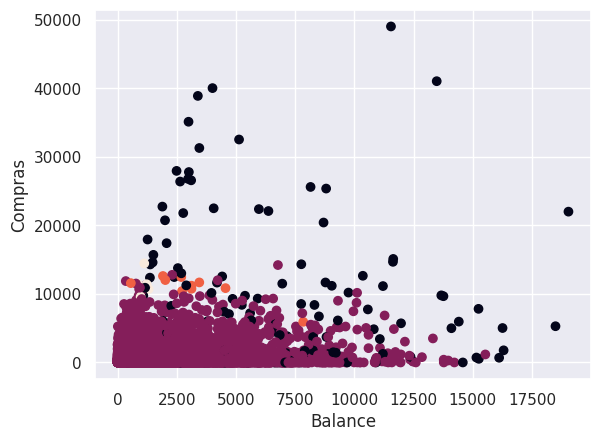

In [107]:
import matplotlib.pyplot as plt

plt.scatter(df['BALANCE'], df['PURCHASES'], c=clusters)
plt.xlabel("Balance")
plt.ylabel("Compras")
plt.show()

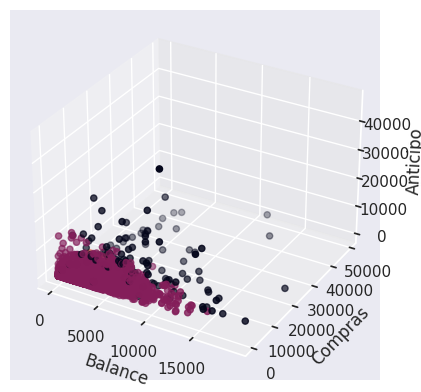

In [108]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['BALANCE'], df['PURCHASES'], df['CASH_ADVANCE'], c=clusters)
ax.set_xlabel("Balance")
ax.set_ylabel("Compras")
ax.set_zlabel("Anticipo")
plt.show()

# ***Observaciones y conclusiones***

La clusterización de los datos ha terminado con 3 clústeres más el clúster de ruido, con una métrica relativamente alta para el corto conjunto de datos dado. Habrá que probar otras técnicas de clusterización para comprobar cual nos da mejores resultados.